# GRIP: The Sparks Foundation- Data Science & Business Analytics Internship

### Author: ADITI SHARMA
### Email: aditi0712sharma@gmail.com
### Batch: GRIP APRIL 2022
### **Task 1: Prediction using Supervised ML**

### Detail: Predict the percentage of a student based on the no. of study hours. This is a simple linear regression as it involves only two variables.

### Importing the required libraries:

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Importing the datasets

In [14]:
data_source="http://bit.ly/w-data"
df_student= pd.read_csv(data_source)
df_student.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Reading the dataset

In [15]:
df_student.shape

(25, 2)

In [16]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Checking if any null value exists in the dataset:

In [17]:
df_student.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Data Visualization

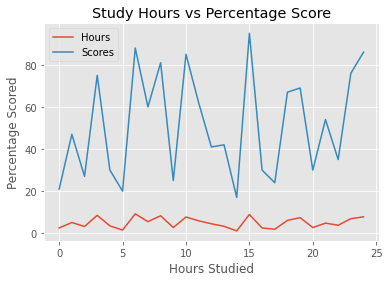

In [18]:
plt.style.use('ggplot')
df_student.plot(kind='line')
plt.title('Study Hours vs Percentage Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

#### Plotting a regression line to view the correlation.

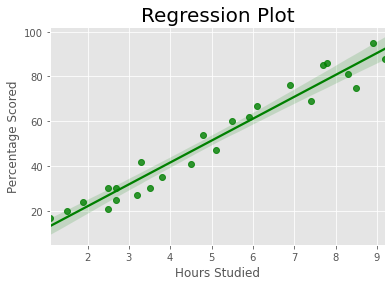

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [19]:
sns.regplot(x=df_student['Hours'], y=df_student['Scores'],color='g')
plt.title('Regression Plot', size=20)
plt.xlabel('Hours Studied',size=12)
plt.ylabel('Percentage Scored',size=12)
plt.show()
print(df_student.corr())

#### From the above plot it is clear that our variables have a positive correlation.

### Training the Model
#### 1. Splitting the Data

In [20]:
# Defining x and y 
x= df_student.iloc[:,:-1].values
y= df_student.iloc[:,1].values
# Splitting the data
train_x, test_x, train_y,test_y=train_test_split(x,y,test_size=0.5, random_state=7)

#### 2. Fitting the data

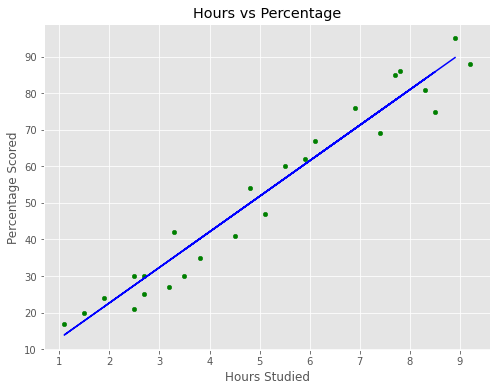

In [24]:
# plotting the regression line
line= Regressor.coef_ * train_x + Regressor.intercept_
df_student.plot(kind='scatter', x='Hours', y='Scores', figsize=(8,6), color='g')
plt.plot(train_x, line, color='b')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

#### *The Blue line indicates the best fit line for the given dataset.*

In [25]:
Regressor= LinearRegression()
Regressor.fit(train_x,train_y)
print('Model Taining Completed!')
print('Intercept: ',Regressor.intercept_)
print('Coefficient: ',Regressor.coef_)

Model Taining Completed!
Intercept:  3.1636310620971386
Coefficient:  [9.73101315]


### Predicting percentage Scored

In [26]:
print('Testing set: ')
print(test_x)

Testing set: 
[[5.1]
 [1.5]
 [5.9]
 [3.3]
 [3.2]
 [4.8]
 [2.7]
 [2.5]
 [4.5]
 [2.5]
 [6.9]
 [9.2]
 [2.7]]


In [27]:
predict_y=Regressor.predict(test_x)
prediction=pd.DataFrame({'Hours':[i for i in test_x], 'Predicted Score' : [j for j in predict_y]})
prediction

,Hours,Predicted Score
0,[5.1],52.791798
1,[1.5],17.760151
2,[5.9],60.576609
3,[3.3],35.275974
4,[3.2],34.302873
5,[4.8],49.872494
6,[2.7],29.437367
7,[2.5],27.491164
8,[4.5],46.953190
9,[2.5],27.491164


#### Comparing Actual Score and Predicted Score

In [28]:
comparison= pd.DataFrame({'Actual Score':test_y, 'Predicted Score':predict_y})
comparison

,Actual Score,Predicted Score
0,47,52.791798
1,20,17.760151
2,62,60.576609
3,42,35.275974
4,27,34.302873
5,54,49.872494
6,25,29.437367
7,30,27.491164
8,41,46.953190
9,21,27.491164


### Visualising the comparison between scores

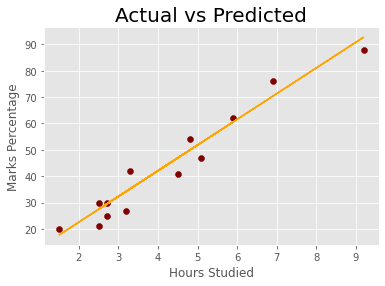

In [29]:
plt.scatter(x=test_x, y=test_y, color='maroon')
plt.plot(test_x, predict_y, color='orange')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

### Evaluating the Model

#### Calculating mean absolute error and r2 to view the accuracy using metrics:

In [30]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [31]:
print('Mean Absolute Error: ',mean_absolute_error(test_y, predict_y))
print('R2 Score: %.2f' % r2_score(predict_y, test_y))

Mean Absolute Error:  4.457227975144809
R2 Score: 0.94


#### Low value of Mean absolute error indicates less chances of false forcasting and R2 score of 0.94 reveals that 94% of the data fits the regression model.

## Predicting percentage Scored if studied for 9.25 hours/day.

In [32]:
hrs= 9.25
predicted_score=Regressor.predict([[hrs]])
print(f'Number of Hours: {hrs}')
print(f'Predicted Percentage Scored: {predicted_score[0]}')

Number of Hours: 9.25
Predicted Percentage Scored: 93.17550272319242


## To conclude, 9.25 hours/day of studying will lead to 93.18% of marks scored.